# 1. Import Libarary

In [44]:
# !pip install jcopml --q #install jcopml sebagai library tambahan

# Basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# SKlearn
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.neural_network import MLPClassifier

# JCOP ML
from jcopml.plot import plot_missing_value
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import grid_search_params as gsp
# from jcopml.feature_importance import mean_score_decrease

# Tensorflow
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout
from keras.constraints import maxnorm

# ignore warning
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 2. Data Loading

## 2.1 Import Data

In [45]:
data = pd.read_csv('telco-customer-churn.csv')
df = data.copy()

## 2.2 BackUp Data

In [46]:
df = df.drop('customerID', axis=1)

In [47]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2.3 Check Missing Value

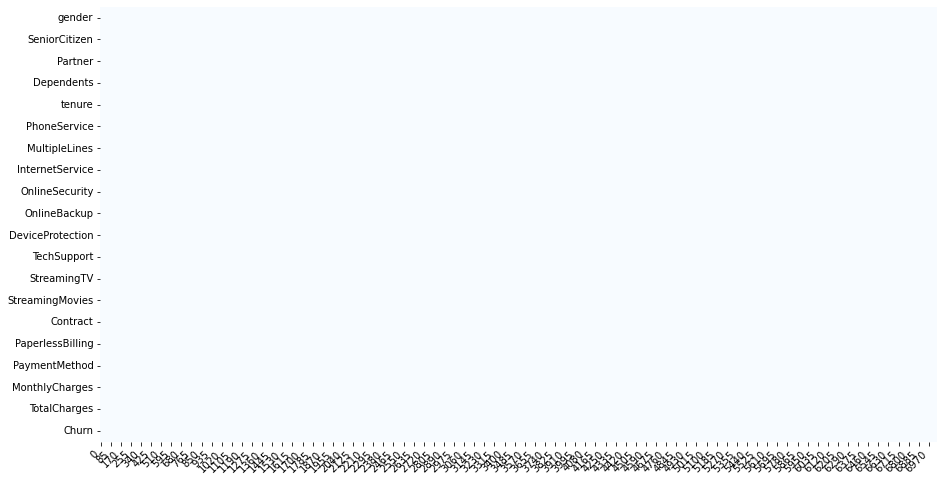

In [48]:
plot_missing_value(df)

`tidak terlihat adanya`<b> missing value </b> `, namun harus diwaspadai pada `<b>Fitur Kategorik</b>` dimana ada data kosong berbentuk string ' ', sehingga data harus diisi dengan modus dari setiap fitur` 

In [49]:
df.loc[df['TotalCharges'] == ' '].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


`contoh data kosong ' ' pada fitur TotalCharges`

## 2.4 Replace Data

In [50]:
total_charges = df['TotalCharges']
df = df.drop('TotalCharges', axis=1)

`Fitur TotalCharges dipisahkan karena diduga kuat memiliki data kosong ' '`

##### Split Data (Numerik and Kategorik)

In [51]:
kategorik = [ i for i in df.columns if df[i].dtype =='O']
numerik = [i for i in df.columns if df[i].dtype !='O']
print('tipe data kategorik:',kategorik, '\n')
print('tipe data numerik:',numerik)

tipe data kategorik: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] 

tipe data numerik: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [9]:
for x in df[numerik].columns:
    df[numerik][x] = np.where(df[numerik][x] == ' ', df[x].median(), df[numerik][x])

`data numerik tidak akan diproses karena jika data numerik memiliki data kosong ' ', maka akan terdeteksi sebagai missing value`

In [10]:
for x in df[kategorik].columns:
    df[kategorik][x] = np.where(df[kategorik][x] == ' ', df[kategorik][x].mode(), df[kategorik][x])

`memastikan semua data kategorik tidak memiliki data kosong ' ', sehingga jika ada data kosong maka akan diganti dengan modus dari setiap fitur`

In [11]:
total_charges = np.where(total_charges == ' ', total_charges.mode()[1], total_charges)

`mengganti data kosong pada fitur TotalCharges menjadi modus`

#### Combine All Data

In [12]:
df['TotalCharges'] = total_charges

## 2.5 Check Data Type

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


- `Fitur `<b>TotalCharges</b>` akan diubah float sehinga dapat diolah lebih lanjut`

In [14]:
df['TotalCharges']  = df['TotalCharges'].astype('float')

# 3. Exploratory Data Analysis

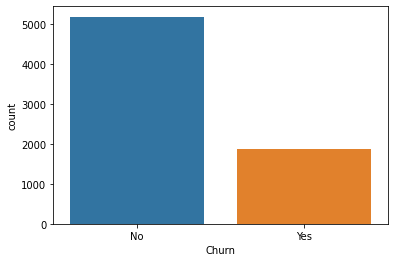

In [15]:
ax = sns.countplot('Churn', data = df)
# ax.bar_label(container=ax.containers[0])

`berdasarkan data, Customer `<b>tetap / setia lebih banyak (5174) </b>` dibanding dengan customer yang `<b> pindah (1869)</b>

<AxesSubplot:xlabel='tenure', ylabel='count'>

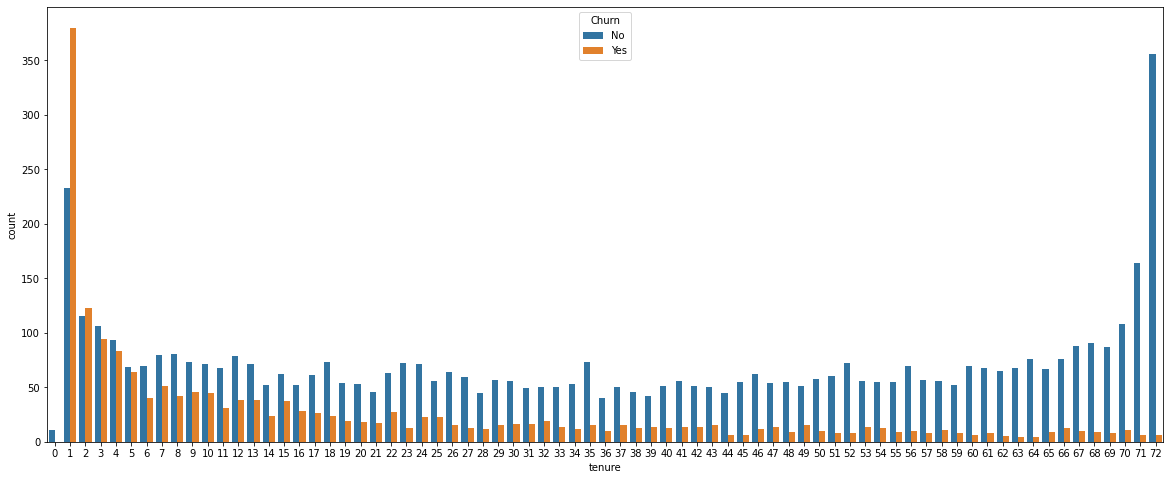

In [16]:
plt.figure(figsize=(20,8))
sns.countplot('tenure', data = df, hue = 'Churn')

- `banyak customer yang pindah setelah bulan pertama, sehingga diperlukan pemeriksaan lebih lanjut`
- `Costumer churn rate akan terus berkurang seiring penpanjangan service`
- `setelah masuk bulan ke 70, costumer akan semakin setia`

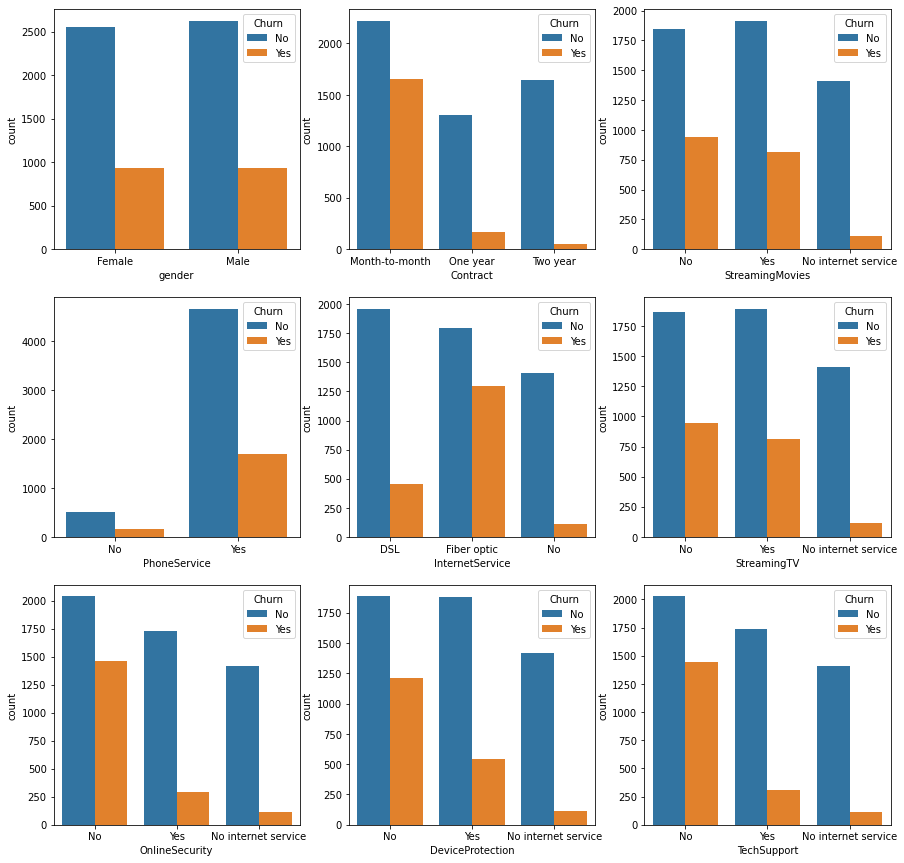

In [17]:
cat_var = ['gender', 'Contract', 'StreamingMovies', 'PhoneService', 'InternetService', 'StreamingTV', 'OnlineSecurity', 'DeviceProtection', 'TechSupport']

fig, axes = plt.subplots(3,3, figsize=(15,15))

for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(cat, data=df, hue='Churn', ax= ax)

- `berdasarkan plot, lebih dari` <b> 50% customer </b> `baik laki-laki maupun perempuan menjadi pelanggan tetap dan menikmati beberapa produk yang ditawarkan`
- `berdasarkan` <b> contract </b>`,lebih banyak customer yang memilih` <b> month-to-month </b>`, biasanya adalah pelanggan yang baru mencoba produk dan `<b>40% dari customer </b>` month-to-month `<b> meniggalkan </b>` service kita pada bulan pertamanya`

<AxesSubplot:xlabel='TotalCharges'>

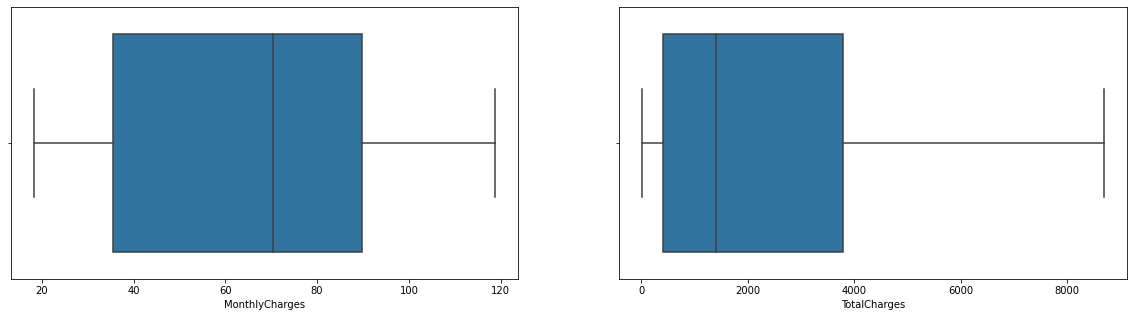

In [18]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(x = df['MonthlyCharges'])

plt.subplot(1,2,2)
sns.boxplot(x = df['TotalCharges'])

<b>tidak ada outliers</b> `pada fitur MonthlyCharges dan TotalCharges`

# 4. Preprocessing Data

## 4.1 Data Splitting

In [19]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, stratify=y, test_size=0.1, random_state=42) #train
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42) #train val

## 4.2 Data Encoding

In [20]:
preprocessor = ColumnTransformer([
                  ('cat_1', cat_pipe(encoder='onehot'), ['MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']),
                  ('cat_2', cat_pipe(encoder='ordinal'), ['gender','Partner','Dependents', 'PhoneService', 'PaperlessBilling']),
                  ('num', num_pipe(scaling = 'minmax'), ['SeniorCitizen', 'tenure','MonthlyCharges','TotalCharges'])
])

def label_x():
    preprocessor.fit(X_train)
    return preprocessor.transform(X_train), preprocessor.transform(X_test), preprocessor.transform(X_valid)

def label_y():
    label = preprocessing.LabelEncoder()
    label.fit(y_train)
    return label.transform(y_train), label.transform(y_test), label.transform(y_valid)

X_train_new, X_test_new, X_valid_new = label_x()
y_train_new, y_test_new, y_valid_new = label_y()

# 5. Data Modelling

## 5.1 Extract & Transform Process

In [21]:
def ET(train, test):
    return tf.data.Dataset.from_tensor_slices((train, test)).shuffle(buffer_size=16).batch(8)

In [22]:
train_dataset = ET(X_train_new, y_train_new)
test_dataset  = ET(X_test_new, y_test_new)
valid_dataset = ET(X_valid_new, y_valid_new)

## 5.2 Load Process & Data Architecture

In [23]:
def model():    
    data_input  = tf.keras.Input(shape= 40)
    hidden      = tf.keras.layers.Dense(8, activation = 'relu', name= 'hidden_1')(data_input)
    # hidden    = tf.keras.layers.Dense(8, activation = 'relu', name= 'hidden_2')(hidden)
    output_lay  = tf.keras.layers.Dense(1, activation = 'sigmoid', name= 'predict')(hidden)

    model = Model(inputs = data_input, outputs = output_lay)
    
    model.compile(loss = 'binary_crossentropy', #untuk binary classification
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

def running():
    # run the model
    run     = model()
    history = run.fit(train_dataset, epochs = 30, batch_size= 8, validation_data=(valid_dataset))
    return run, history

def grafik(data):
    # show the graph
    metrics = pd.DataFrame(data.history)
    return metrics[['loss', 'val_loss']].plot(), metrics[['accuracy', 'val_accuracy']].plot();

# 5.2 Compiling and Fitting Model

In [52]:
run, history = running()

Epoch 1/30
595/595 [==============================] - 2s 3ms/step - loss: 0.5367 - accuracy: 0.7309 - val_loss: 0.4420 - val_accuracy: 0.7905
Epoch 2/30
595/595 [==============================] - 2s 3ms/step - loss: 0.4402 - accuracy: 0.7911 - val_loss: 0.4244 - val_accuracy: 0.8013
Epoch 3/30
595/595 [==============================] - 1s 2ms/step - loss: 0.4321 - accuracy: 0.7928 - val_loss: 0.4186 - val_accuracy: 0.7975
Epoch 4/30
595/595 [==============================] - 1s 2ms/step - loss: 0.4288 - accuracy: 0.7944 - val_loss: 0.4160 - val_accuracy: 0.8000
Epoch 5/30
595/595 [==============================] - 1s 2ms/step - loss: 0.4272 - accuracy: 0.7942 - val_loss: 0.4141 - val_accuracy: 0.8038
Epoch 6/30
595/595 [==============================] - 1s 2ms/step - loss: 0.4258 - accuracy: 0.7972 - val_loss: 0.4130 - val_accuracy: 0.8044
Epoch 7/30
595/595 [==============================] - 1s 2ms/step - loss: 0.4249 - accuracy: 0.7972 - val_loss: 0.4122 - val_accuracy: 0.8082
Epoch 

(<AxesSubplot:>, <AxesSubplot:>)

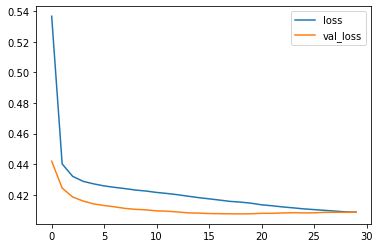

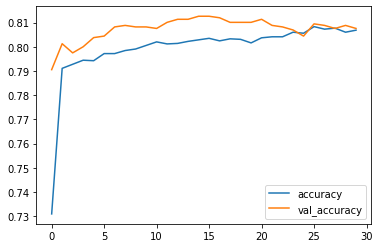

In [53]:
grafik(history)

## 5.3 Prediction

In [54]:
res = run.predict(X_test_new)
res_1 = (res > 0.5)
res_1_1 =  np.where(res >= 0.5, 'no', 'yes')
pd.DataFrame(res_1_1).transpose()


,0,1,2,3,4,5,6,7,8,9,...,695,696,697,698,699,700,701,702,703,704
0,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,...,yes,yes,no,yes,yes,no,yes,no,yes,yes


In [59]:
cm  = confusion_matrix(y_test_new, res_1)
cr = classification_report(y_test_new, res_1)
print('Classification Report')
print(cr,'\n \n')
print('Confusion Matrix')
cm

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       518
           1       0.65      0.54      0.59       187

    accuracy                           0.80       705
   macro avg       0.75      0.72      0.73       705
weighted avg       0.79      0.80      0.80       705
 
 

Confusion Matrix


array([[464,  54],
       [ 86, 101]], dtype=int64)

# 6. Parameter Tuning

## 6.1 Using Grid Search

In [28]:
# good_model = KerasClassifier(build_fn=model, verbose=0)

# # define the grid search parameters
# batch_size = [10, 40, 80, 100]
# epochs = [10, 50, 100]

# param_grid = dict(batch_size  = batch_size, epochs=epochs)
# grid = GridSearchCV(estimator = good_model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train_new, y_train_new)

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [29]:
# good_model = KerasClassifier(build_fn=model_coba, epochs=40, batch_size=10, verbose=0)
# # define the grid search parameters
# optimizer = ['SGD', 'Adam', 'Nadam']

# learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
# momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]

# init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

# weight_constraint = [1, 2, 3, 4, 5]
# dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# neurons = [1,2]

# param_grid = dict(
#     # Training Optimizer
#     optimizer=optimizer,
    
#     # Learning Rate and Momentum
#     learn_rate=learn_rate, momentum=momentum,
    
#     # Network Weight Initialization
#     init_mode=init_mode,
    
#     # Dropout Regularization
#     dropout_rate=dropout_rate, weight_constraint=weight_constraint,
    
#     # Number of Neurons in the Hidden Layer
#     neurons=neurons
#     )
# grid = GridSearchCV(estimator=good_model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

### `saya tidak merekomendasikan menggunakan grid search jika anda sedang terburu - buru karena terlalu banyak menghabiskan resources`

## 6.2 Trial and Error

In [29]:
def model_baru(activation_hidden, optim, learn_ra, DO, epo, basi):
    model = Sequential()
    model.add(Dense(64, activation = activation_hidden, name= 'hidden_1', input_shape=(40,)))
    model.add(Dropout(DO))
    # model.add(keras.layers.BatchNormalization()),
    
    model.add(Dense(16, activation = activation_hidden, name= 'hidden_2'))
    model.add(Dropout(DO))
    # model.add(keras.layers.BatchNormalization()),
    
    model.add(Dense(8, activation = activation_hidden, name= 'hidden_3'))
    model.add(Dropout(DO))
    model.add(keras.layers.BatchNormalization())
    
    model.add(Dense(1, activation = 'sigmoid', name= 'predict'))
    
    opt = optim(lr=learn_ra)
    model.compile(loss = 'binary_crossentropy', #untuk binary classification
            optimizer= opt,
            metrics=['accuracy'])
    
    run = model
    history = model.fit(train_dataset, epochs = epo, batch_size= basi, validation_data=(valid_dataset))
    return run, history


def grafik(data):
    # show the graph
    metrics = pd.DataFrame(data.history)
    return metrics[['loss', 'val_loss']].plot(), metrics[['accuracy', 'val_accuracy']].plot();

Contoh :

- activation          = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
- init_mode           = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
- weight_constraint   = [1, 2, 3, 4, 5]
- dropout_rate        = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
- optimizer           = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
- learn_rate          = [0.001, 0.01, 0.1, 0.2, 0.3]
- momentum            = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]

In [39]:
run2, history2 = model_baru(activation_hidden = 'relu',
                          optim             = Adam,
                          learn_ra          = 0.0001,
                          DO                = 0.3, 
                          epo               = 16, 
                          basi              = 8)

Epoch 1/16
595/595 [==============================] - 4s 4ms/step - loss: 0.8160 - accuracy: 0.5176 - val_loss: 0.6184 - val_accuracy: 0.6618
Epoch 2/16
595/595 [==============================] - 3s 5ms/step - loss: 0.7108 - accuracy: 0.5862 - val_loss: 0.5783 - val_accuracy: 0.7186
Epoch 3/16
595/595 [==============================] - 2s 4ms/step - loss: 0.6609 - accuracy: 0.6259 - val_loss: 0.5479 - val_accuracy: 0.7451
Epoch 4/16
595/595 [==============================] - 2s 3ms/step - loss: 0.6225 - accuracy: 0.6629 - val_loss: 0.5282 - val_accuracy: 0.7401
Epoch 5/16
595/595 [==============================] - 3s 5ms/step - loss: 0.5972 - accuracy: 0.6758 - val_loss: 0.5158 - val_accuracy: 0.7495
Epoch 6/16
595/595 [==============================] - 2s 4ms/step - loss: 0.5641 - accuracy: 0.7044 - val_loss: 0.5023 - val_accuracy: 0.7350
Epoch 7/16
595/595 [==============================] - 2s 4ms/step - loss: 0.5544 - accuracy: 0.7155 - val_loss: 0.4871 - val_accuracy: 0.7476
Epoch 

(<AxesSubplot:>, <AxesSubplot:>)

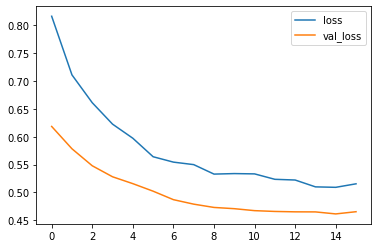

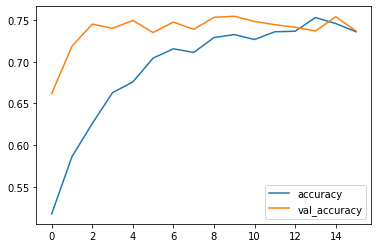

In [40]:
grafik(history2)

In [42]:
res2 = run2.predict(X_test_new)
res_2 = (res2 > 0.5)
res_2_2 =  np.where(res2 >= 0.5, 'no', 'yes')
pd.DataFrame(res_2_2).transpose()

,0,1,2,3,4,5,6,7,8,9,...,695,696,697,698,699,700,701,702,703,704
0,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,...,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes


In [43]:
cm2  = confusion_matrix(y_test_new, res_2)
cr2 = classification_report(y_test_new, res_2)
# print('Classification Report Before Tuning\n', cr,'\n \n')
print('Classification Report After Tuning\n', cr2,'\n \n')

# print('Confusion Matrix Before Tuning\n', cm)
print('Confusion Matrix After Tuning\n', cm2)


Classification Report After Tuning
               precision    recall  f1-score   support

           0       0.75      0.99      0.85       518
           1       0.78      0.07      0.14       187

    accuracy                           0.75       705
   macro avg       0.76      0.53      0.49       705
weighted avg       0.76      0.75      0.66       705
 
 

Confusion Matrix After Tuning
 [[514   4]
 [173  14]]


`tidak ada perbedaan sebelum dan sesudah di tuning`

## 6.3 MLPClassifier

In [111]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('mlp', MLPClassifier(random_state=42))
])

parameter = {
    "mlp__alpha": [0.0001, 0.0003, 0.001, 0.003],
    "mlp__hidden_layer_sizes": [(16,), (32, 16), (32, 16, 8)],
    "mlp__learning_rate_init": [0.001, 0.005, 0.01],
    "mlp__learning_rate_init": [0.001, 0.01, 0.1, 0.2],
    "mlp__activation": ["relu", "logistic", "tanh"]
}

model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
{'mlp__activation': 'logistic', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (32, 16, 8), 'mlp__learning_rate_init': 0.001}
0.8112770881548496 0.8037034381671605 0.8014184397163121


In [112]:
# df_imp = mean_score_decrease(X_train, y_train, model, plot=True)

# 7 Model Inference

## 7.1 Basic Model

untuk memperoleh data baru, disini saya menyatukan 100 data dari setiap data X kemudian membuat fungsi random untuk mendapatkan 10 data baru.

In [131]:
trainx = pd.DataFrame(X_train_new)
testx = pd.DataFrame(X_test_new)
valx = pd.DataFrame(X_valid_new)

testing = pd.concat([trainx.sample(100), testx.sample(100), valx.sample(100)], ignore_index = True)
dummy = testing.sample(10)

melakukan proses prediksi menggunakan data baru

In [132]:
model_pred   = run.predict(dummy)
# model_pred_data = (model_pred > 0.5)
model_pred_1  = np.where(model_pred >= 0.5, 'yes', 'no')
pd.DataFrame(model_pred_1).transpose()

,0,1,2,3,4,5,6,7,8,9
0,yes,yes,no,yes,yes,yes,yes,no,yes,yes


## 7.2 MLPClassifier Model

In [133]:
trainx = pd.DataFrame(X_train)
testx = pd.DataFrame(X_test)
valx = pd.DataFrame(X_valid)

testing = pd.concat([trainx.sample(100), testx.sample(100), valx.sample(100)], ignore_index = True)
dummy = testing.sample(10, random_state= 42)

In [134]:
model_pred2   = model.predict(dummy)
pd.DataFrame(model_pred2).transpose()

,0,1,2,3,4,5,6,7,8,9
0,Yes,No,No,Yes,No,No,No,No,No,No


# 9. Conclusion

## 9.1 EDA Analysis

- `berdasarkan analisis lebih dari `<b> 50% customer </b> ` baik laki-laki maupun perempuan menyukai produk yang ditawarkan dan menjadi pelanggan tetap`
- `Costumer churn rate akan terus berkurang seiring customer melakukan penpanjangan service yang artinya customer menyukai produk yang ditawarkan`
- `diperlukan analisis lebih lanjut pada bulan pertama ketika customer berlangganan, dimana lebih dari 350 customer churn pada bulan pertama mereka berlangganan`

## 9.2 Model Analysis

- `Basic model`<b> (1 hidden layer dan 30 neuron serta epoch = 10 dan batch_size = 8) </b> ` memiliki model yang tidak overfit dan accuracy yang lumayan baik dimana nilai accuracy adalah 0.80`

- `Parameter Tuning bisa dilakukan dengan 3 cara, Keras Library, Trial and Error, dan Scikit Learn`

- `kombinasi parameter yang digunakan pada Trial and Error adalah sebagi berikut:`
    - Batch                             = 8
    - Epoch                             = 16
    - Training Optimizer                = Adam
    - Hidden Layer                      = 3
    - Learning Rate                     = 0.0001
    - Dropout Rate                      = 0.3
    - Activation func (hidden layer)    = relu
    - Activation func (output layer)    = sigmoid

- `Dengan membandingkan 3 model yang telah digunakan (Basic Model, Trial and Error, dan Skicit Learn), didapatkan bahwa model Scikit Learn dan basic model adalah model terbaik, keduanya tidak memiliki perbedaan loss yang significant`

- `Menggunakan Skicit Learn sebenarnya bisa dilakukan, namun memiliki banyak keterbatasan dalam Deep Learning, salah satunya adalah tidak bisa meng`<b><i>`handle`</i></b>` dataset dengan jumlah yang banyak (bigdata)`